In [1]:
!pip install transformers

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import pandas as pd

In [3]:
df2 = pd.read_csv("politeness_strategy.csv") 
df2

,filename,interaction_number,speaker,sentence_number,text,task_type,Initials,Birth month,Birth Year,Mother tongue,...,marker::politeness_markers_==1st_person_start==,marker::politeness_markers_==2nd_person==,marker::politeness_markers_==2nd_person_start==,marker::politeness_markers_==Indirect_(greeting)==,marker::politeness_markers_==Direct_question==,marker::politeness_markers_==Direct_start==,marker::politeness_markers_==HASPOSITIVE==,marker::politeness_markers_==HASNEGATIVE==,marker::politeness_markers_==SUBJUNCTIVE==,marker::politeness_markers_==INDICATIVE==
0,PAIK_PA_bot.docx,1,You,1,How do the Reasoning Smogs work?,Information,PA,11,2011,english / french,...,[],[],[],[],"[[('how', 0, 0)]]",[],"[[('work', 0, 5)]]",[],[],[]
1,PAIK_PA_bot.docx,1,You,2,I'm done.,Information,PA,11,2011,english / french,...,"[[('i', 0, 0)]]",[],[],[],[],[],[],[],[],[]
2,PAIK_PA_bot.docx,1,ChatGPT,1,The Reasoning Smogs work by using tricky state...,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],"[[('work', 0, 3)]]","[[('tricky', 0, 6)], [('confuse', 0, 9)], [('d...",[],[]
3,PAIK_PA_bot.docx,1,ChatGPT,2,They’re meant to test if someone can figure ou...,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],[],[],[]
4,PAIK_PA_bot.docx,1,ChatGPT,3,Each Smog gives a reason that sounds okay at f...,Information,PA,11,2011,english / french,...,[],"[[('you', 0, 13)]]",[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,PAIK_AG_bot.docx,30,ChatGPT,6,Est-ce que ça t’intéresserait ?,Learning,AG,6,2011,french,...,[],"[[('you', 0, 3)]]",[],[],[],[],[],[],[],[]
1832,PAIK_AG_bot.docx,31,You,1,"Oops, Sidney, where's your ChatGPT?",Learning,AG,6,2011,french,...,[],"[[('your', 0, 6)]]",[],[],[],[],[],[],[],[]
1833,PAIK_AG_bot.docx,31,ChatGPT,1,"Ah, I see we switched to English now!",Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],[],[],[]
1834,PAIK_AG_bot.docx,31,ChatGPT,2,"When you say “Sidney, where’s your ChatGPT?”—c...",Learning,AG,6,2011,french,...,[],"[[('you', 0, 1)], [('your', 0, 8)], [('you', 0...",[],[],[],[],[],[],[],[]


In [4]:
#!pip install transformers torch  # if you haven't already

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd


In [5]:
#other tried:  frfede/distilroberta-politeness"   "gljj/politeness-model" # RuyuanWan/Politeness_RoBERTa_Text_Disagreement_Binary_Classifier"
model_name ="Genius1237/xlm-roberta-large-tydip" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Put model in eval mode
model.eval()


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, ou

In [6]:
def get_politeness_score(text: str) -> float:
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    
    # Disable gradient calculations (no training)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits  # Shape: [batch_size, 2]
        
        # Convert logits to probabilities
        probs = torch.softmax(logits, dim=1)
        
        # Probability that the text is "polite" (label=1)
        prob_polite = probs[0, 1].item()
    
    return prob_polite


In [7]:
df2['politeness_score_Genius1237/xlm-roberta-large-tydip'] = df2['text'].apply(get_politeness_score)
df2

,filename,interaction_number,speaker,sentence_number,text,task_type,Initials,Birth month,Birth Year,Mother tongue,...,marker::politeness_markers_==2nd_person==,marker::politeness_markers_==2nd_person_start==,marker::politeness_markers_==Indirect_(greeting)==,marker::politeness_markers_==Direct_question==,marker::politeness_markers_==Direct_start==,marker::politeness_markers_==HASPOSITIVE==,marker::politeness_markers_==HASNEGATIVE==,marker::politeness_markers_==SUBJUNCTIVE==,marker::politeness_markers_==INDICATIVE==,politeness_score_Genius1237/xlm-roberta-large-tydip
0,PAIK_PA_bot.docx,1,You,1,How do the Reasoning Smogs work?,Information,PA,11,2011,english / french,...,[],[],[],"[[('how', 0, 0)]]",[],"[[('work', 0, 5)]]",[],[],[],0.091018
1,PAIK_PA_bot.docx,1,You,2,I'm done.,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],[],[],0.850426
2,PAIK_PA_bot.docx,1,ChatGPT,1,The Reasoning Smogs work by using tricky state...,Information,PA,11,2011,english / french,...,[],[],[],[],[],"[[('work', 0, 3)]]","[[('tricky', 0, 6)], [('confuse', 0, 9)], [('d...",[],[],0.192281
3,PAIK_PA_bot.docx,1,ChatGPT,2,They’re meant to test if someone can figure ou...,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],[],[],0.112596
4,PAIK_PA_bot.docx,1,ChatGPT,3,Each Smog gives a reason that sounds okay at f...,Information,PA,11,2011,english / french,...,"[[('you', 0, 13)]]",[],[],[],[],[],[],[],[],0.242443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,PAIK_AG_bot.docx,30,ChatGPT,6,Est-ce que ça t’intéresserait ?,Learning,AG,6,2011,french,...,"[[('you', 0, 3)]]",[],[],[],[],[],[],[],[],0.993382
1832,PAIK_AG_bot.docx,31,You,1,"Oops, Sidney, where's your ChatGPT?",Learning,AG,6,2011,french,...,"[[('your', 0, 6)]]",[],[],[],[],[],[],[],[],0.061305
1833,PAIK_AG_bot.docx,31,ChatGPT,1,"Ah, I see we switched to English now!",Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],[],[],0.981103
1834,PAIK_AG_bot.docx,31,ChatGPT,2,"When you say “Sidney, where’s your ChatGPT?”—c...",Learning,AG,6,2011,french,...,"[[('you', 0, 1)], [('your', 0, 8)], [('you', 0...",[],[],[],[],[],[],[],[],0.068942


In [21]:
# This shows the data type of each value in the column
print(df2['text_en'].apply(type).value_counts())
df2['text_en'] = df2['text_en'].apply(lambda x: x if isinstance(x, str) else "")
print(df2['text_en'].apply(type).value_counts())

text_en
<class 'str'>         1833
<class 'NoneType'>       3
Name: count, dtype: int64
text_en
<class 'str'>    1836
Name: count, dtype: int64


In [22]:
df2['politeness_score_Genius1237/xlm-roberta-large-tydip_en'] = df2['text_en'].apply(get_politeness_score)
df2

,filename,interaction_number,speaker,sentence_number,text,task_type,Initials,Birth month,Birth Year,Mother tongue,...,marker::politeness_markers_==Indirect_(greeting)==,marker::politeness_markers_==Direct_question==,marker::politeness_markers_==Direct_start==,marker::politeness_markers_==HASPOSITIVE==,marker::politeness_markers_==HASNEGATIVE==,marker::politeness_markers_==SUBJUNCTIVE==,marker::politeness_markers_==INDICATIVE==,politeness_score_Genius1237/xlm-roberta-large-tydip,politeness_label,politeness_score_Genius1237/xlm-roberta-large-tydip_en
0,PAIK_PA_bot.docx,1,You,1,How do the Reasoning Smogs work?,Information,PA,11,2011,english / french,...,[],"[[('how', 0, 0)]]",[],"[[('work', 0, 5)]]",[],[],[],0.091018,impolite,0.091018
1,PAIK_PA_bot.docx,1,You,2,I'm done.,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],0.850426,polite,0.850426
2,PAIK_PA_bot.docx,1,ChatGPT,1,The Reasoning Smogs work by using tricky state...,Information,PA,11,2011,english / french,...,[],[],[],"[[('work', 0, 3)]]","[[('tricky', 0, 6)], [('confuse', 0, 9)], [('d...",[],[],0.192281,impolite,0.192281
3,PAIK_PA_bot.docx,1,ChatGPT,2,They’re meant to test if someone can figure ou...,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],0.112596,impolite,0.112596
4,PAIK_PA_bot.docx,1,ChatGPT,3,Each Smog gives a reason that sounds okay at f...,Information,PA,11,2011,english / french,...,[],[],[],[],[],[],[],0.242443,impolite,0.242443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,PAIK_AG_bot.docx,30,ChatGPT,6,Est-ce que ça t’intéresserait ?,Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],0.993382,polite,0.991822
1832,PAIK_AG_bot.docx,31,You,1,"Oops, Sidney, where's your ChatGPT?",Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],0.061305,impolite,0.061305
1833,PAIK_AG_bot.docx,31,ChatGPT,1,"Ah, I see we switched to English now!",Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],0.981103,polite,0.981103
1834,PAIK_AG_bot.docx,31,ChatGPT,2,"When you say “Sidney, where’s your ChatGPT?”—c...",Learning,AG,6,2011,french,...,[],[],[],[],[],[],[],0.068942,impolite,0.068942


In [25]:
df2['politeness_score_diff'] = df2['politeness_score_Genius1237/xlm-roberta-large-tydip_en'] - df2['politeness_score_Genius1237/xlm-roberta-large-tydip']

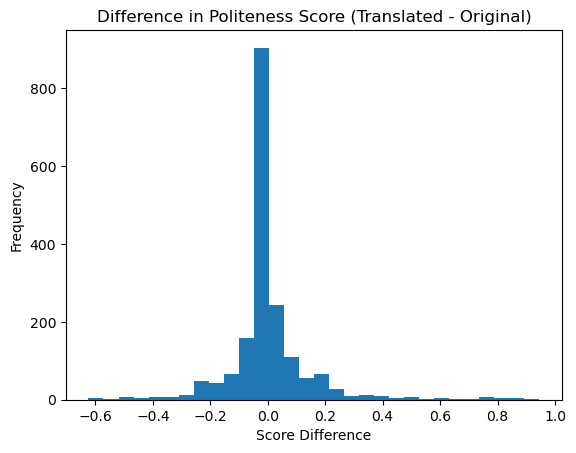

count    1836.000000
mean        0.009249
std         0.150375
min        -0.624368
25%        -0.022588
50%         0.000000
75%         0.017553
max         0.945499
Name: politeness_score_diff, dtype: float64


In [30]:
import matplotlib.pyplot as plt

plt.hist(df2['politeness_score_diff'].dropna(), bins=30)
plt.title("Difference in Politeness Score (Translated - Original)")
plt.xlabel("Score Difference")
plt.ylabel("Frequency")
#plt.axvline(0, color='red', linestyle='--')
plt.show()
desc = df2['politeness_score_diff'].describe()
print(desc)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
# Shapiro-Wilk test for normality
stat, p = shapiro(df2['politeness_score_diff'].dropna())
print(f"Shapiro-Wilk test: W={stat:.3f}, p-value={p:.3f}")


Shapiro-Wilk test: W=0.751, p-value=0.000


In [32]:
from scipy.stats import wilcoxon

# Drop NaNs
score_pairs = df2[['politeness_score_Genius1237/xlm-roberta-large-tydip', 
                  'politeness_score_Genius1237/xlm-roberta-large-tydip_en']].dropna()

stat, p = wilcoxon(score_pairs.iloc[:,1], score_pairs.iloc[:,0])
print(f"Wilcoxon signed-rank test: W={stat}, p-value={p:.3f}")


Wilcoxon signed-rank test: W=405102.0, p-value=0.902


In [23]:
output = "/Users/olga/Olga's workspace/Politeness Study/politeness_score.csv"
df2.to_csv(output, index=False)

In [9]:
df2["politeness_score_Genius1237/xlm-roberta-large-tydip"].describe()

count    1836.000000
mean        0.642270
std         0.313657
min         0.003291
25%         0.392859
50%         0.723051
75%         0.935156
max         0.997902
Name: politeness_score_Genius1237/xlm-roberta-large-tydip, dtype: float64

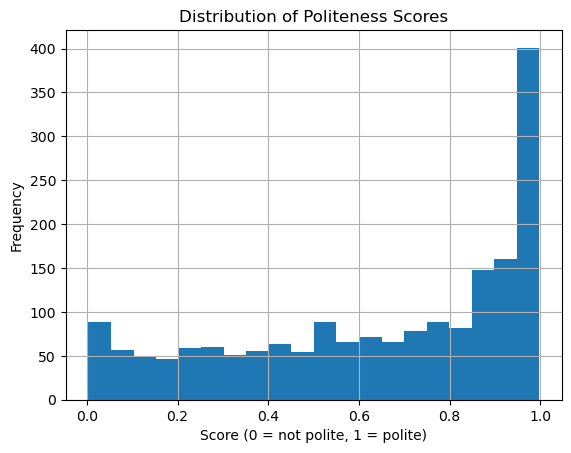

count    1836.000000
mean        0.009249
std         0.150375
min        -0.624368
25%        -0.022588
50%         0.000000
75%         0.017553
max         0.945499
Name: politeness_score_diff, dtype: float64


In [29]:
import matplotlib.pyplot as plt

df2["politeness_score_Genius1237/xlm-roberta-large-tydip"].hist(bins=20)
plt.title("Distribution of Politeness Scores")
plt.xlabel("Score (0 = not polite, 1 = polite)")
plt.ylabel("Frequency")
plt.show()



In [11]:
def label_politeness(score):
    if score >= 0.7:
        return "polite"
    elif score <= 0.3:
        return "impolite"
    else:
        return "neutral"

df2["politeness_label"] = df2["politeness_score_Genius1237/xlm-roberta-large-tydip"].apply(label_politeness)


In [12]:
df2.groupby("speaker")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()


speaker
ChatGPT    0.646302
You        0.631307
Name: politeness_score_Genius1237/xlm-roberta-large-tydip, dtype: float64

<Axes: xlabel='Age at experiment'>

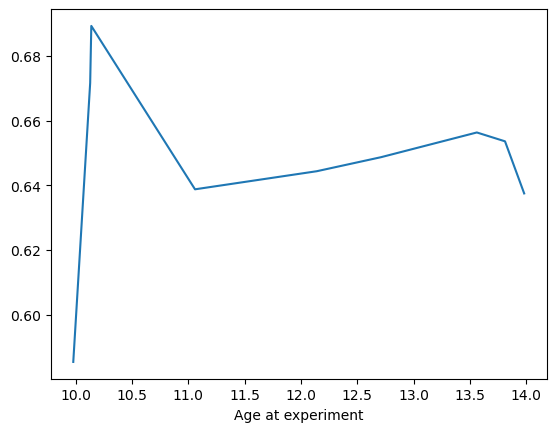

In [14]:
df2.groupby("Age at experiment")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean().plot()


In [20]:
df2_speaker_politeness = (
    df2.groupby('speaker')['politeness_score_Genius1237/xlm-roberta-large-tydip']
      .mean()
      .reset_index()
      .rename(columns={'politeness_score': 'avg_politeness_score'})
)

# Now df_speaker_politeness contains each speaker's average politeness level
print(df2_speaker_politeness)

   speaker  politeness_score_Genius1237/xlm-roberta-large-tydip
0  ChatGPT                                           0.643870  
1      You                                           0.629673  


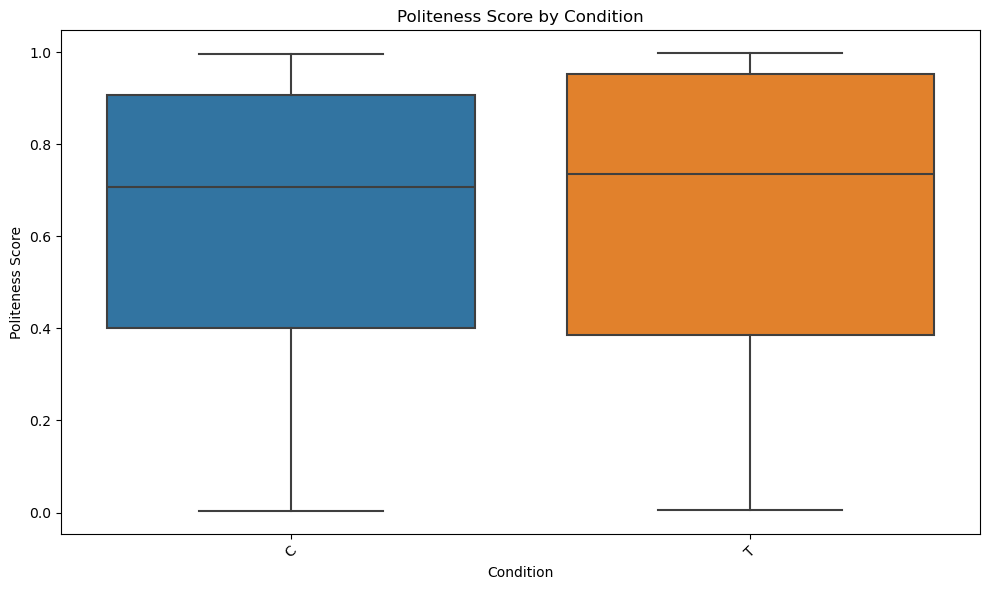

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Condition",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    data=df2
)
plt.title("Politeness Score by Condition")
plt.ylabel("Politeness Score")
plt.xlabel("Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df2.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean().sort_values(ascending=False)


Condition
T    0.647457
C    0.626253
Name: politeness_score_Genius1237/xlm-roberta-large-tydip, dtype: float64

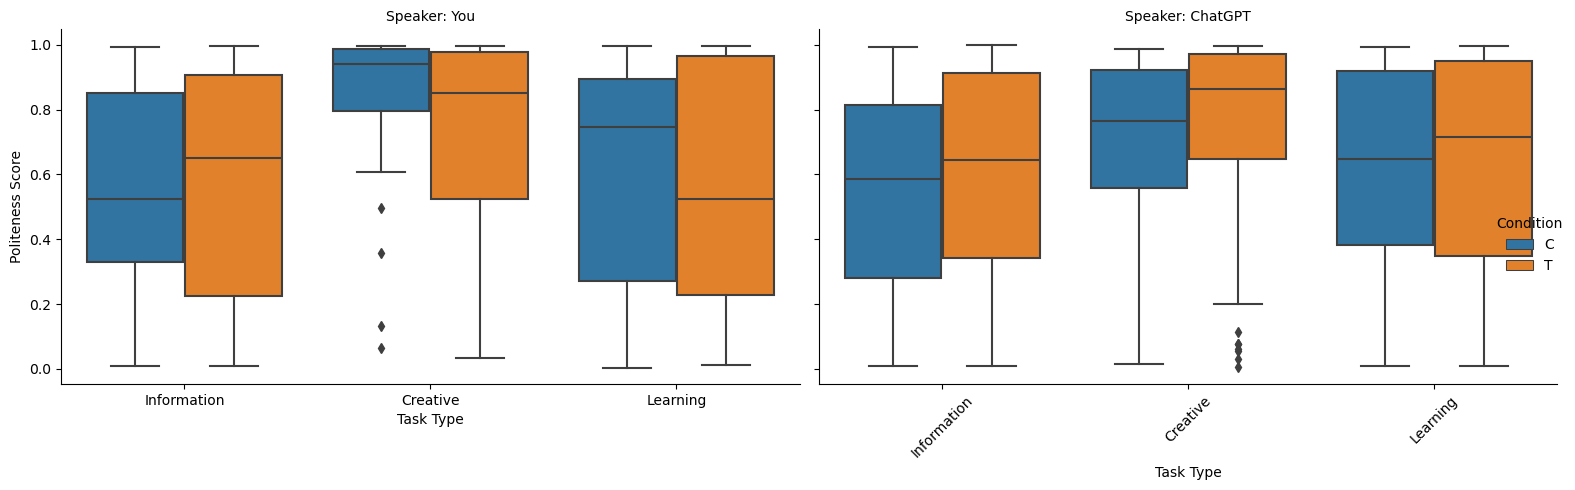

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df2,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    col="speaker",
    kind="box",
    height=5,
    aspect=1.5
)
g.set_titles("Speaker: {col_name}")
g.set_axis_labels("Task Type", "Politeness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
overall_politeness = df['politeness_score'].mean()
print("Overall conversation politeness:", overall_politeness)

Overall conversation politeness: 0.7748824899395307


In [18]:
df['overall_politeness'] = overall_politeness


In [10]:

# Group by speaker and task_type, then calculate mean politeness score
grouped_scores = df2.groupby(["filename", "speaker", "task_type"])["politeness_score"].mean().reset_index()

# Rename for clarity (optional)
grouped_scores = grouped_scores.rename(columns={"politeness_score": "avg_politeness_score"})
grouped_scores

,filename,speaker,task_type,avg_politeness_score
0,PAIK_AG_bot.docx,ChatGPT,Creative,0.773492
1,PAIK_AG_bot.docx,ChatGPT,Information,0.561457
2,PAIK_AG_bot.docx,ChatGPT,Learning,0.553850
3,PAIK_AG_bot.docx,You,Creative,0.828694
4,PAIK_AG_bot.docx,You,Information,0.533242
5,PAIK_AG_bot.docx,You,Learning,0.474060
6,PAIK_CA_bot.docx,ChatGPT,Creative,0.750024
7,PAIK_CA_bot.docx,ChatGPT,Information,0.733674
8,PAIK_CA_bot.docx,ChatGPT,Learning,0.654101
9,PAIK_CA_bot.docx,You,Creative,0.842844


In [12]:
df2[df2["filename"] == "PAIK_EL_bot.docx"]

,filename,interaction_number,speaker,sentence_number,text,task_type,Initials,Birth month,Birth Year,Mother tongue,Sex,Date of experiment,Experimenter,Place experiment,Age at experiment,Condition,Language of experiment,Order of tasks,politeness_score
482,PAIK_EL_bot.docx,0,NaN,1,"User: How do you work, ChatGPT?",Information,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.906131
483,PAIK_EL_bot.docx,0,NaN,2,I'm finished.,Information,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.668325
484,PAIK_EL_bot.docx,0,NaN,3,"TP-bot: Thank you for your question, and for l...",Information,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.997125
485,PAIK_EL_bot.docx,0,NaN,4,I work by using patterns in language to help a...,Information,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.783404
486,PAIK_EL_bot.docx,0,NaN,5,"I'm not a person, and I don't have thoughts or...",Information,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.248800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,PAIK_EL_bot.docx,33,ChatGPT,6,Would you like to keep going with more like th...,Learning,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.978836
700,PAIK_EL_bot.docx,34,You,1,I would like to stop.,Learning,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.889289
701,PAIK_EL_bot.docx,34,ChatGPT,1,Of course.,Learning,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.773552
702,PAIK_EL_bot.docx,34,ChatGPT,2,Thank you for being so thoughtful and curious ...,Learning,EL,5.0,2014.0,french / english,m,5/7/2025,Paco,Neuchâtel,11.04,T,English,LC,0.994785
